<a href="https://colab.research.google.com/github/Vicky-0222/ML/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Для практики №2 взяла датасет "blood" из kaggle.**

# 1. Анализ целевой переменной Y с точки зрения статистики

**1. Импорт необходимых библиотек**

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**2. Загружаем набор данных**

In [ ]:
df =  pd.read_csv('/content/blood.csv')

In [ ]:
df

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: Recency
колонка: Frequency
колонка: Monetary
колонка: Time
колонка: Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


**3. Проверяем наличие пропущенных значений и работа с пропусками для числовых**

In [ ]:
# проверка на пропущенные значения
print(df.isnull().sum())

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size = 5, replace = True)]

,Recency,Frequency,Monetary,Time,Class
102,4,9,2250,40,0
435,16,7,1750,93,0
270,16,11,2750,40,0
106,0,8,2000,59,0
71,2,4,1000,16,0


In [ ]:
# проверка на пропущенные значения
print(df_test_nan.isnull().sum())

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [ ]:
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum())


# Удаление строк с пропусками
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [ ]:
df_median = df_test_nan.copy()
df_median.Class = df_median.Class.fillna(df_median.Class.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum())


# Заполнение пропусков медианой
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [ ]:
df_mean = df_test_nan.copy()
df_mean.Class = df_mean.Class.fillna(df_median.Class.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum())


# Заполнение пропусков средним
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [ ]:
# Заполнение категориальных признаков происходит с помощью df.category_variable.mode()

**4. Выбираем целевую переменную**

In [ ]:
df['frequency_of_blood'] = np.where(df['Frequency'] >= 5, 1, 0).astype(int)

In [ ]:
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class',
       'frequency_of_blood'],
      dtype='object')

In [ ]:
Y = df['frequency_of_blood']
X = df.drop('frequency_of_blood', axis=1)

X = X.drop('Frequency', axis=1)

**5. Графический анализ**

In [151]:
numeric_cols = X.select_dtypes(include=['float', 'int64'])
numeric_cols

,Recency,Monetary,Time,Class
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
743,23,500,38,0
744,21,500,52,0
745,23,750,62,0
746,39,250,39,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


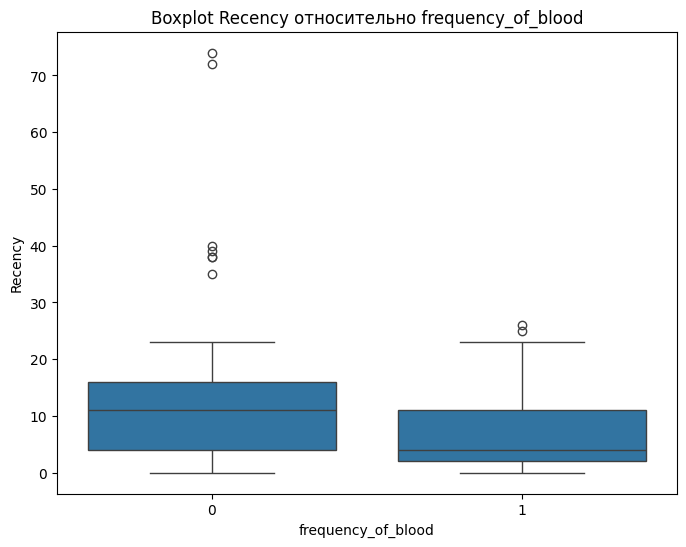

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


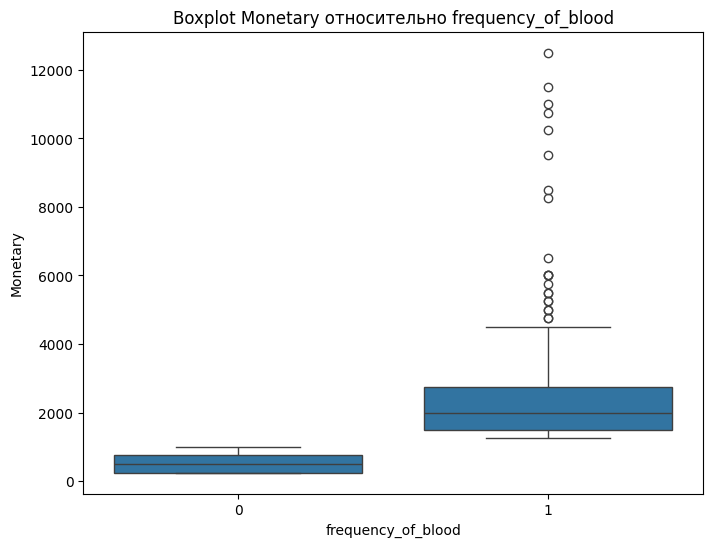

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


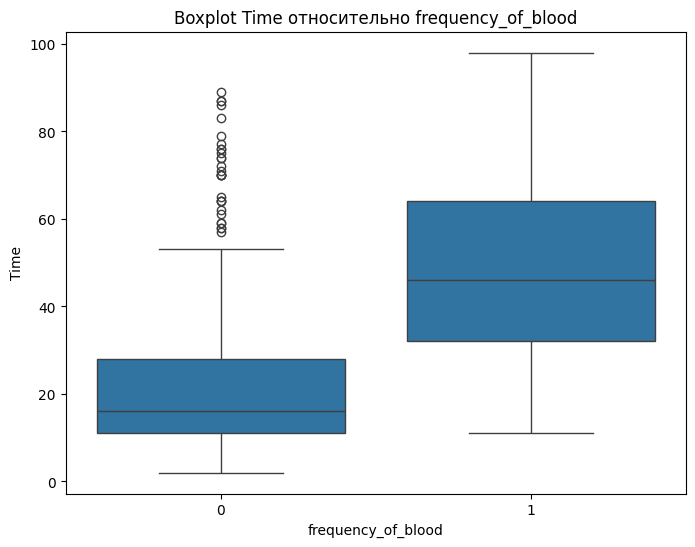

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


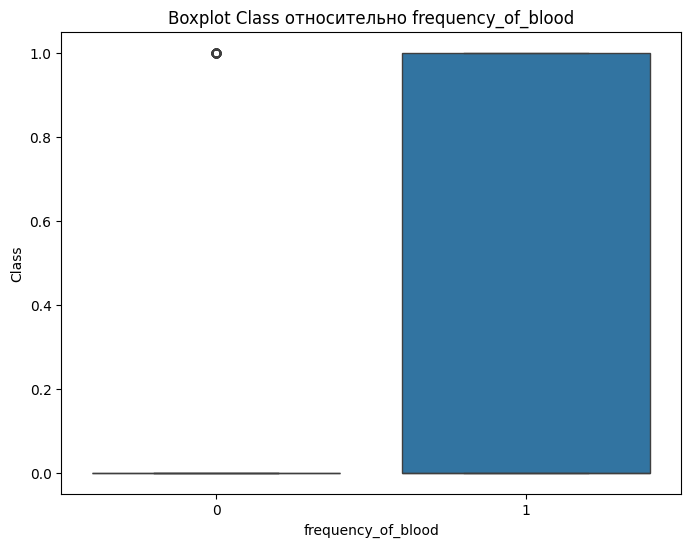

In [152]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='frequency_of_blood', y=col, data=df)
    plt.title(f'Boxplot {col} относительно frequency_of_blood')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

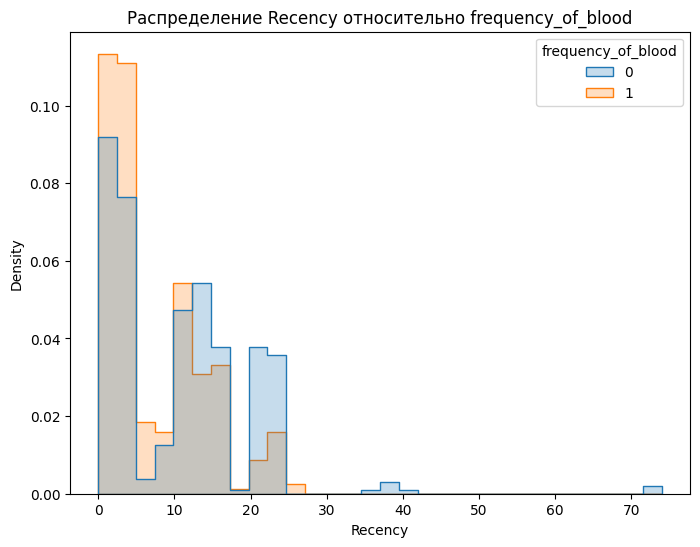

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

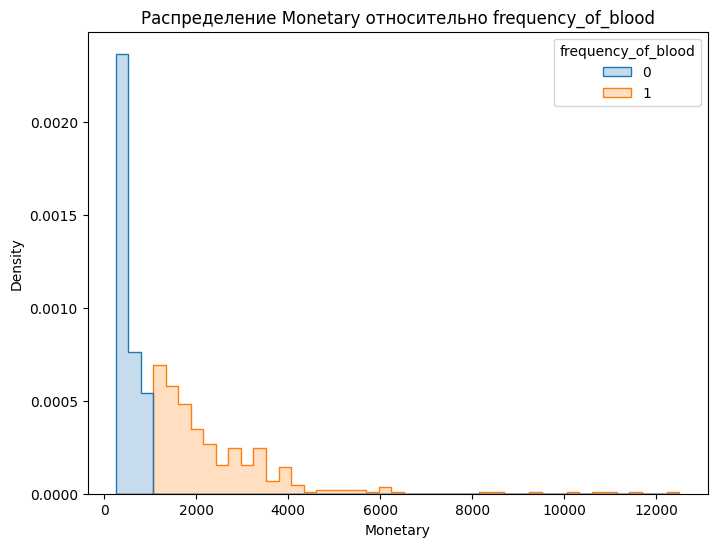

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

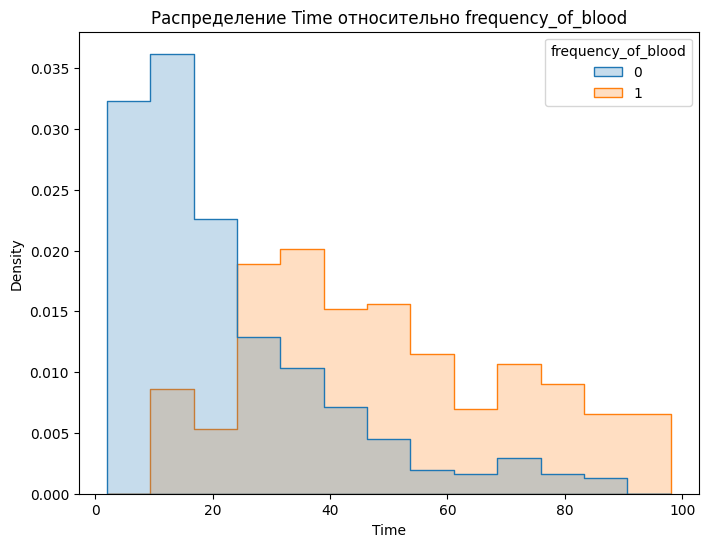

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

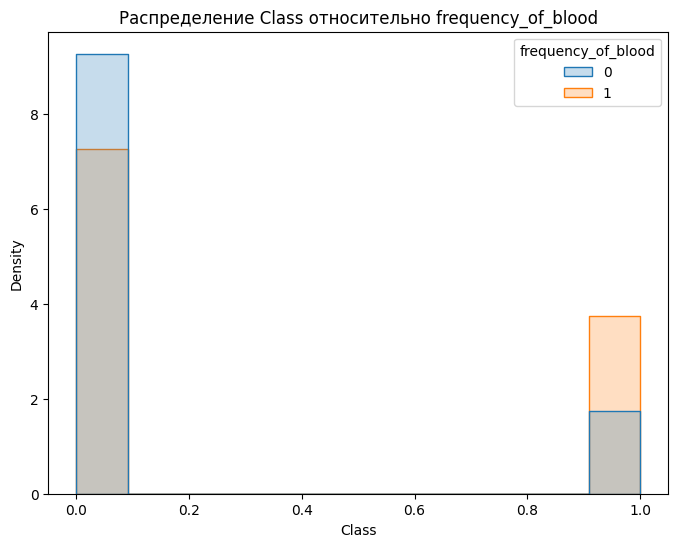

In [153]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='frequency_of_blood', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно frequency_of_blood')
    plt.show()

In [160]:
desc_stats_numeric = df.groupby('frequency_of_blood')[df.select_dtypes(include=[np.number]).columns].describe()

**Описание полученных результатов**

In [157]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('frequency_of_blood')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для Recency:

                    count       mean       std  min  25%   50%   75%   max
frequency_of_blood                                                        
0                   419.0  10.997613  9.012352  0.0  4.0  11.0  16.0  74.0
1                   329.0   7.607903  6.268003  0.0  2.0   4.0  11.0  26.0


Описательная статистика для Monetary:

                    count         mean          std     min     25%     50%  \
frequency_of_blood                                                            
0                   419.0   531.622912   269.651097   250.0   250.0   500.0   
1                   329.0  2457.446809  1636.129109  1250.0  1500.0  2000.0   

                       75%      max  
frequency_of_blood                   
0                    750.0   1000.0  
1                   2750.0  12500.0  


Описательная статистика для Time:

                    count       mean        std   min   25%   50%   75%   max
frequency_of_blood                   

описать результаты⏰⏰⏰

сделать вывод

# 2. Расчет теста Пирсона

**1. Рассчитайте коэффициенты корреляции Пирсона для каждого признака**

In [161]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Recency,Frequency,Monetary,Time,Class,frequency_of_blood
Recency,1.000000,-0.182745,-0.182745,0.160618,-0.279869,-0.207978
Frequency,-0.182745,1.000000,1.000000,0.634940,0.218633,0.655253
Monetary,-0.182745,1.000000,1.000000,0.634940,0.218633,0.655253
Time,0.160618,0.634940,0.634940,1.000000,-0.035854,0.553611
Class,-0.279869,0.218633,0.218633,-0.035854,1.000000,0.213201
frequency_of_blood,-0.207978,0.655253,0.655253,0.553611,0.213201,1.000000


2. Интерпретируйте результаты

#3. Машинное обучение

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [163]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Recency', 'Monetary', 'Time', 'Class']


In [164]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [165]:
X_processed

,Recency_1,Recency_2,Recency_3,Recency_4,Recency_5,Recency_6,Recency_7,Recency_8,Recency_9,Recency_10,...,Time_82,Time_83,Time_86,Time_87,Time_88,Time_89,Time_93,Time_95,Time_98,Class_1
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
746,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [166]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: []


In [167]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

ValueError: at least one array or dtype is required

In [ ]:
X_processed